<a href="https://colab.research.google.com/github/victoriamaina/A-Research-on-which-symptoms-indicate-the-patient-has-hypothyroid./blob/main/Hypothyroid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Research on which symptoms indicate the patient has hypothyroid.**

By
 Victoria Maina



## **1. Defining the Question**

Hypothyroidism (underactive thyroid) is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones.

Nairobi hospital wishes to know whether a patient's symptoms indicate the patient has hypothyroid.



### a) Specifying the Question



To build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.



### b) Defining the Metric for Success

This project will be successful when:

1)We Identify the most crucial independent variables that affect Hypothyroidism.

2)The model achieves atleast 80% accuracy




### c) Understanding the context 

>  You have been tasked to study the symptoms of hypothyroid from a data collected from the Nairobi hospital. Later onwards, create a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.


### d) Recording the Experimental Design

> The following steps were taken:

Business Understanding

Reading the data

Checking our data

Data cleaning

Performing EDA

Feature Engineering

Hyperparemeter tuning 

Decision Trees

Support Vector Machine 

Challenging the solution

Conclusion

### e) Data Relevance

Datasets Provided:

hypothyroid [Link](http://bit.ly/hypothyroid_data)

## **2. Reading the Data**

In [1]:
# Importing the libraries we will need 

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import scipy.stats

from scipy import stats

### Reading the Dataset from our CSV file

In [2]:
#loading the dataset
df=pd.read_csv("/content/hypothyroid.csv")
#previewing the dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [3]:
#checking the tail
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


## **3. Data Understanding**

In [4]:
#getting the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

Our dataset comprises of object data types.

In [5]:
#checking the columns
#
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

We have 26 columns as shown above.

In [6]:
#Getting the shape
#
df.shape

(3163, 26)

There are 3163 records and 26 variables.

In [7]:
#getting basic statistical details
df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


The count ,unique and frequency are shown above.

In [8]:
#getting the number unique values in each column
df.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

These are the number of unique values in each column.

In [9]:
df.TBG

0       ?
1       ?
2       ?
3       ?
4       ?
       ..
3158    ?
3159    ?
3160    ?
3161    ?
3162    ?
Name: TBG, Length: 3163, dtype: object

In [10]:
#checking for missing values
df.isnull().sum().sum()

0

There are 0 missing values.

## **4. Data Cleaning**

> This done by following the data integrity rules i.e Validity, Accuracy, Completeness, Consistency, Uniformity to ensure the data is ready for analysis

### 4.1 Completeness

In [11]:
#checking for null values across each column
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

the dataset has no null values.

In [12]:
# Checking for missing values as a percentage
# Sorting the missing values in a descending order
#
(df.isna().mean().round(4) * 100).sort_values(ascending = False)


status                       0.0
age                          0.0
TBG_measured                 0.0
FTI                          0.0
FTI_measured                 0.0
T4U                          0.0
T4U_measured                 0.0
TT4                          0.0
TT4_measured                 0.0
T3                           0.0
T3_measured                  0.0
TSH                          0.0
TSH_measured                 0.0
goitre                       0.0
lithium                      0.0
tumor                        0.0
sick                         0.0
pregnant                     0.0
query_hyperthyroid           0.0
query_hypothyroid            0.0
thyroid_surgery              0.0
on_antithyroid_medication    0.0
query_on_thyroxine           0.0
on_thyroxine                 0.0
sex                          0.0
TBG                          0.0
dtype: float64

In [13]:
#Checking for the percentage of the missing values
df.isna().mean().round(4) * 100

status                       0.0
age                          0.0
sex                          0.0
on_thyroxine                 0.0
query_on_thyroxine           0.0
on_antithyroid_medication    0.0
thyroid_surgery              0.0
query_hypothyroid            0.0
query_hyperthyroid           0.0
pregnant                     0.0
sick                         0.0
tumor                        0.0
lithium                      0.0
goitre                       0.0
TSH_measured                 0.0
TSH                          0.0
T3_measured                  0.0
T3                           0.0
TT4_measured                 0.0
TT4                          0.0
T4U_measured                 0.0
T4U                          0.0
FTI_measured                 0.0
FTI                          0.0
TBG_measured                 0.0
TBG                          0.0
dtype: float64

### 4.2 Validity

In [14]:
#irrelevant Data
#Drop columns we do not need.
#

df=df.drop(['TBG','TBG_measured'], axis = 1)

The  columns are dropped because have a high value of missing data.

In [15]:
# Replacing spaces in the column names with underscore
df.columns= df.columns.str.replace(" ", "_")

To make our columns look neater.

In [16]:
# Changing column names to lower case
df.columns= df.columns.str.lower()


In [17]:
# Replacing the '?' in age with NAN
#
df.replace('?', np.nan, inplace=True)


### 4.3 Consistency

In [18]:
#checking for duplicates
df.duplicated().sum().sum()

152

There are 152 duplicates.

In [19]:
##Dropping the duplicates
df1=df.drop_duplicates(keep=False)

In [20]:
df1.duplicated().sum()

0

After dropping the duplicates there are 0 

### 4.4 Uniformity

In [21]:
#no action was done

### 4.5 Accuracy

In [22]:
#no action was done

# Exporting our new Dataset

In [23]:
# Let's export our dataframe into a csv file as shown 
# we use the to_csv function to create a csv file and export it

df1.to_csv('/content/hypothyroid.csv')
df2 = pd.read_csv('/content/hypothyroid.csv', index_col=0)
df2.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0


## **5. Exploratory Data Analysis**

### Univariate Analysis

#### Measures of central Tendacies

In [24]:
from numpy.ma.core import append
numerical_columns=['age','tsh','t3','tt4','t4u','fti']
for column in numerical_columns:
  print('\n')
  print(column + ', Mean: '+ str(df2[column].mean()))
  print(column + ', Mode:' + str(df2[column].mode()))
  print(column + ', Median: ' + str(df2[column].median()))



age, Mean: 51.47172859450727
age, Mode:0    62.0
dtype: float64
age, Median: 54.0


tsh, Mean: 5.6897818465134415
tsh, Mode:0    0.0
dtype: float64
tsh, Median: 0.7


t3, Mean: 1.9272610921501683
t3, Mode:0    1.6
1    1.8
2    2.1
dtype: float64
t3, Median: 1.8


tt4, Mean: 108.55683945284378
tt4, Mode:0    98.0
dtype: float64
tt4, Median: 104.0


t4u, Mean: 0.9768873695573947
t4u, Mode:0    0.98
dtype: float64
t4u, Median: 0.96


fti, Mean: 115.58485611510793
fti, Mode:0    98.0
dtype: float64
fti, Median: 107.0


#### Measures of dispersion

In [25]:
numerical_columns=['age','tsh','t3','tt4','t4u','fti']
for column in numerical_columns:
  print('\n')
  print(column + ', Standard deviation: ' + str(df2[column].std()))
  print(column + ', Variance: ' + str(df2[column].var()))
  print(column + ', Skewness: ' + str(df2[column].skew()))
  print(column + ', Kurtosis: ' + str(df2[column].kurt()))
  print(column + ', Quartiles: ' + str(df2[column].quantile([0.25,0.5,0.75])))



age, Standard deviation: 19.27421495212848
age, Variance: 371.4953620208531
age, Skewness: -0.2054503573417453
age, Kurtosis: -0.9416093300192143
age, Quartiles: 0.25    35.0
0.50    54.0
0.75    67.0
Name: age, dtype: float64


tsh, Standard deviation: 24.151829591040258
tsh, Variance: 583.3108725946478
tsh, Skewness: 10.361245930744651
tsh, Kurtosis: 154.2844742382952
tsh, Quartiles: 0.25    0.0
0.50    0.7
0.75    2.1
Name: tsh, dtype: float64


t3, Standard deviation: 0.9609096860577169
t3, Variance: 0.92334742475954
t3, Skewness: 2.2161095475796433
t3, Kurtosis: 11.727928398443353
t3, Quartiles: 0.25    1.4
0.50    1.8
0.75    2.3
Name: t3, dtype: float64


tt4, Standard deviation: 43.6654530254612
tt4, Variance: 1906.6717879187584
tt4, Skewness: 1.4168423539339625
tt4, Kurtosis: 6.673466255768258
tt4, Quartiles: 0.25     84.0
0.50    104.0
0.75    127.0
Name: tt4, dtype: float64


t4u, Standard deviation: 0.22496906094512437
t4u, Variance: 0.05061107838253108
t4u, Skewness: 0.9

#### Bar Graphs

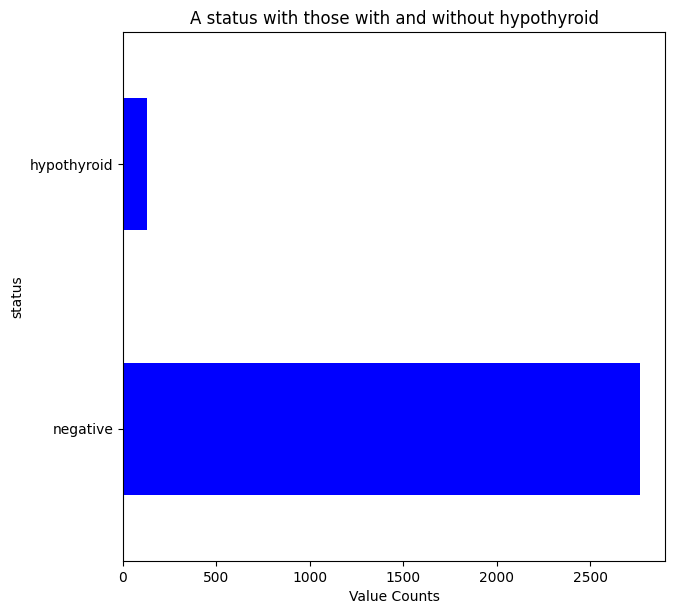

In [26]:
#creating a bar graph of the years with the largest records
#
plt.figure(figsize = (7,7), dpi = 100)
df2.status.value_counts().head()
df2.status.value_counts().head().plot(kind= 'barh',color='blue')
plt.title('A status with those with and without hypothyroid')
plt.xlabel('Value Counts')
plt.ylabel('status')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


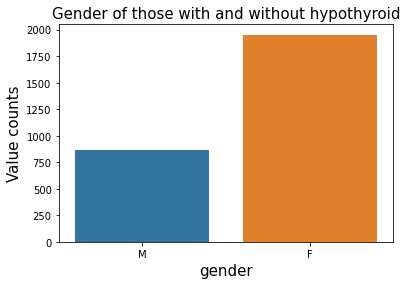

In [27]:

#creating a bar graph of the years with the largest records
#
sns.countplot(df2['sex'])
plt.title('Gender of those with and without hypothyroid',fontsize=15)
plt.xlabel("gender",fontsize=15)
plt.ylabel("Value counts",fontsize=15)
plt.show()

the above data was taken from more females than males.

### Bivariate Analysis

#### Heat Map

In [28]:
#this is a summary analysis of the correlation coefficients in the datasets

corr = df2.corr()

corr.style.background_gradient(cmap='coolwarm')

,age,tsh,t3,tt4,t4u,fti
age,1.000000,-0.008926,-0.328428,-0.092301,-0.213453,0.036160
tsh,-0.008926,1.000000,-0.181573,-0.321621,0.078722,-0.256957
t3,-0.328428,-0.181573,1.000000,0.576667,0.407892,0.300399
tt4,-0.092301,-0.321621,0.576667,1.000000,0.317882,0.669467
t4u,-0.213453,0.078722,0.407892,0.317882,1.000000,-0.306321
fti,0.036160,-0.256957,0.300399,0.669467,-0.306321,1.000000


1. t3 and tt4

correlation coefficient = 0.576667, which is means there is a strong positive relationship between the two variables.

2. tt4 and fti

correlation coefficient = 0.669467, which is closer to 1 indicating a positive relationship between the two variables

3. age vs tsh,t3,tt4,t4u 

there is a small negative relationship or no relationship between the variables. 



### Multivariate Analysis

Label Encoding

In [29]:
#this label encoding will be needed for correlation and multivariate analysis
from sklearn.preprocessing import LabelEncoder
#encoding the object columns
columns =['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 't3_measured', 'tt4_measured',
       't4u_measured', 'fti_measured']
#
# we convert the categorical variables 
#
hypothyroid= df2.apply(LabelEncoder().fit_transform)
#
# Print head
#
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
0,0,69,1,0,0,0,0,0,0,0,0,0,0,0,1,162,1,7,1,22,1,115,1,19
1,0,12,0,1,0,0,0,0,0,0,0,0,0,0,1,217,1,18,1,26,1,80,1,26
2,0,21,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,1,5,1,67,1,0
3,0,21,0,0,0,0,0,0,0,0,0,0,0,0,1,233,1,5,1,8,1,71,1,9
4,0,74,1,0,0,0,0,0,0,0,0,0,0,0,1,106,1,13,1,62,1,95,1,47


#### Linear Discriminant Analysis (LDA)

In [30]:
# Divide the dataset into features and corresponding labels.
X= hypothyroid.drop(["status"],1)
y = hypothyroid["status"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [31]:
#checking for unique values of the target variable
y.unique()

array([0, 1])

In [32]:
#import Linear Discriminant Analysismethod from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [33]:
#create an instance of LDA and train the model
lda= LDA()

lda_= lda.fit(X, y)
lda_feat = lda_. transform(X)

#displaying the coefficients of the reducted columns
lda.coef_

array([[ 8.50389996e-03, -2.71496073e-02, -4.55384248e-01,
         3.01280531e-01,  1.99255896e+00, -3.88752800e-01,
         6.76761263e-01, -6.70786489e-01,  6.56901522e-01,
         2.41848687e+00,  1.12562914e+00,  6.82665013e+00,
        -9.11965337e-01, -1.79658982e+01, -8.43742995e-02,
         2.90107148e+00,  6.31954123e-02,  1.16920037e+01,
         8.81424027e-02, -5.70528684e+00, -1.05299036e-01,
        -1.05490688e+01, -4.68729921e-02]])

In [34]:
#coeeficients are in array thus we need a new dataframe to get the column names
feature_importance = pd.DataFrame(index=X.columns.values, data=lda_.coef_[0].T)
feature_importance.sort_values(0, ascending= False)

,0
tt4_measured,11.692004
lithium,6.826650
t3_measured,2.901071
sick,2.418487
on_antithyroid_medication,1.992559
tumor,1.125629
query_hypothyroid,0.676761
pregnant,0.656902
query_on_thyroxine,0.301281
tt4,0.088142


In [35]:
# using the correlation coefficients o compute the VIF score for each variable we have:
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,age,tsh,t3,tt4,t4u,fti
age,1.153222,0.026351,0.437361,-0.137834,0.095815,-0.044687
tsh,0.026351,1.191186,0.113134,0.673354,-0.445138,-0.315997
t3,0.437361,0.113134,1.831375,-0.570513,-0.583403,-0.333657
tt4,-0.137834,0.673354,-0.570513,4.601500,-2.371599,-3.457634
t4u,0.095815,-0.445138,-0.583403,-2.371599,2.815462,2.507550
fti,-0.044687,-0.315997,-0.333657,-3.457634,2.507550,4.103536


MODELLING

Random Forest Classifier 

In [36]:
X2 = hypothyroid.drop('status', axis = 1)
y2 = hypothyroid.status
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)
# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 10, max_depth=5)

forest = forest.fit(X2_train, y2_train)

# Predict based on the model we've trained
y2_pred = forest.predict(X2_test)


comparison_frame = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred})

comparison_frame.head(5)


,Actual,Predicted
2526,1,1
2334,1,1
24,0,0
1096,1,1
279,1,1


In [37]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

Mean Absolute Error: 0.01611047180667434
Mean Squared Error: 0.01611047180667434
Root Mean Squared Error: 0.12692703339586228


In [38]:
X1 = hypothyroid[['tt4_measured','lithium','sick','on_antithyroid_medication','tumor','query_hypothyroid','pregnant','query_on_thyroxine','tt4','t3','age']]

y1 = hypothyroid.status
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 10, max_depth=5)

forest = forest.fit(X1_train, y1_train)

# Predict based on the model we've trained
y1_pred = forest.predict(X1_test)


comparison_frame = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})

comparison_frame.head(5)

,Actual,Predicted
2526,1,1
2334,1,1
24,0,0
1096,1,1
279,1,1


In [39]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

Mean Absolute Error: 0.02531645569620253
Mean Squared Error: 0.02531645569620253
Root Mean Squared Error: 0.15911145683514602


In [40]:
!pip install --upgrade scikit-learn==0.22

     |████████████████████████████████| 7.0 MB 5.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.22 which is incompatible.


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


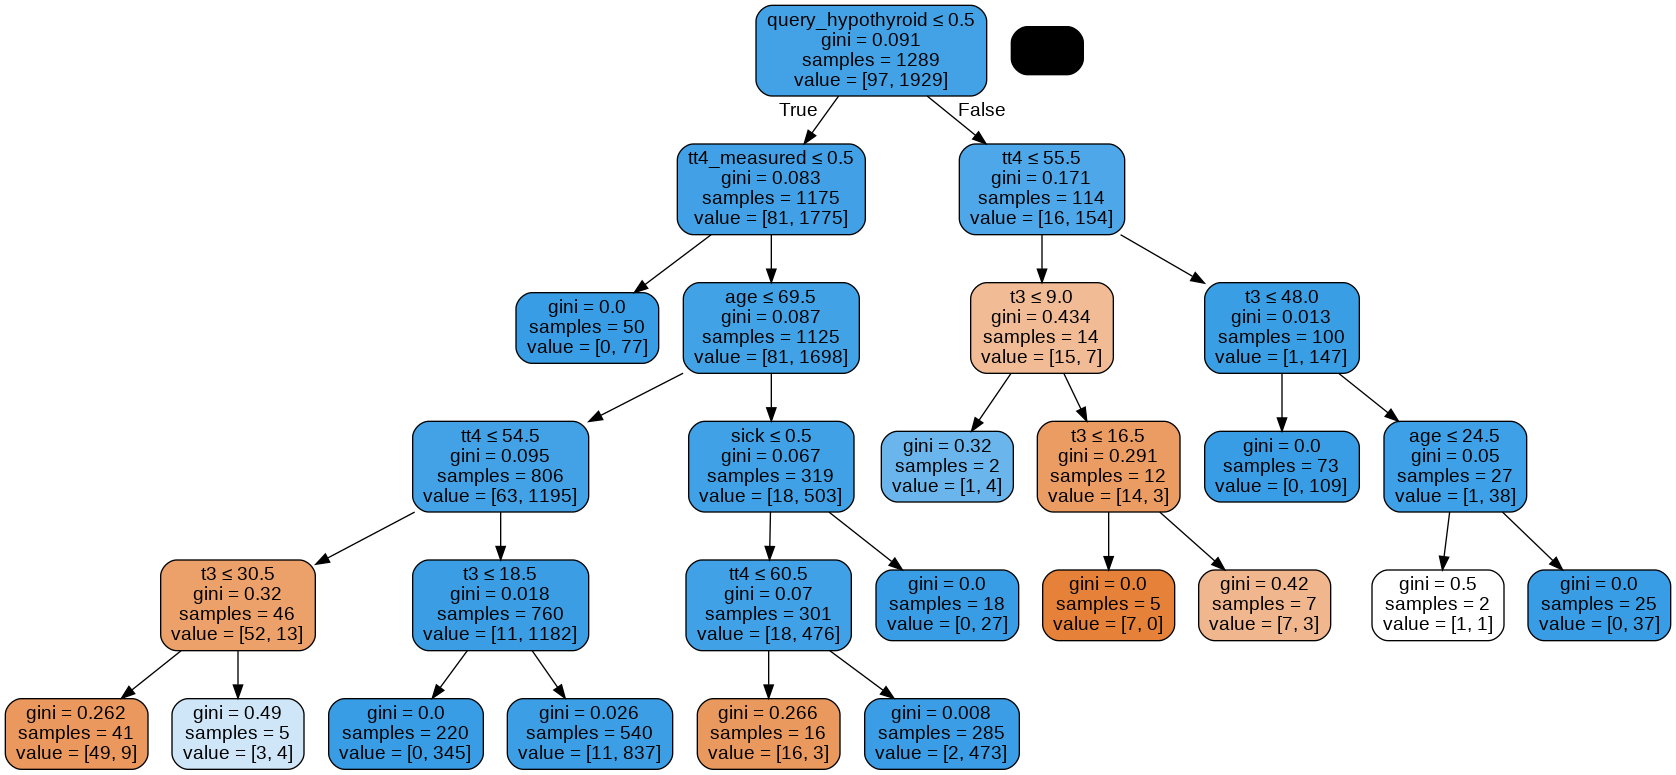

In [41]:

#Visualizing tree number 50
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

from IPython.display import Image  
import pydotplus
y1_pred = forest.predict(X1_test)
dot_data = StringIO()

# picking a specific tree from the forest; tree  number 50
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X1.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid.png')
Image(graph.create_png())

Ada boosted trees


In [42]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=5)

ada_boost = ada_boost.fit(X1_train, y1_train)

y1_pred_ada = ada_boost.predict(X1_test)

accuracy_score(y1_test, y1_pred_ada)


0.9654775604142692

Gradient Boosted Trees

In [43]:
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 30

gradient_classifier = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.001, max_depth=20)
gradient_classifier = gradient_classifier.fit(X1_train, y1_train)

y1_pred_gradient_classifier = gradient_classifier.predict(X1_test)
accuracy_score(y1_test, y1_pred_gradient_classifier)

0.9585730724971231

**SUPPORT VECTOR MACHINES**

In [44]:
#Kernel= linear
from sklearn.svm import SVC
# Building the model 
polyclassifier = SVC(kernel='linear',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X1_train, y1_train)
poly_pred = polyclassifier.predict(X1_test)
accuracy_score(y1_test, poly_pred)

0.9769850402761795

In [45]:
#kernel= rbf
from sklearn.svm import SVC
# Building the model 
polyclassifier1 = SVC(kernel='rbf',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier1.fit(X1_train, y1_train)
poly_pred1 = polyclassifier1.predict(X1_test)
accuracy_score(y1_test, poly_pred1)


0.9597238204833142

In [46]:
#kernel= polynomial
from sklearn.svm import SVC
# Building the model 
polyclassifier2 = SVC(kernel='poly',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier2.fit(X1_train, y1_train)
poly_pred2 = polyclassifier2.predict(X1_test)
accuracy_score(y1_test, poly_pred2)


0.9585730724971231

In [47]:
 # to get the most importantfeatures
tree = forest.estimators_[50]

features = X

importances = list(tree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance 
                       in zip(features, importances)]
# sort in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], 
                             reverse = True)
feature_importances

[('pregnant', 0.94),
 ('sick', 0.05),
 ('thyroid_surgery', 0.01),
 ('tumor', 0.01),
 ('age', 0.0),
 ('sex', 0.0),
 ('on_thyroxine', 0.0),
 ('query_on_thyroxine', 0.0),
 ('on_antithyroid_medication', 0.0),
 ('query_hypothyroid', 0.0),
 ('query_hyperthyroid', 0.0)]

In [48]:
#creating a new set of independent variables based on their importance
X2 = hypothyroid[['pregnant','sick','thyroid_surgery','tumor','age']]
X2 = pd.get_dummies(X2)

In [49]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 30

gbc = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.001, max_depth=20)
gbc = gbc.fit(X2_train, y2_train)

y2_pred_gbc = gbc.predict(X2_test)
accuracy_score(y2_test, y2_pred_gbc)

0.9585730724971231

Using the 5 best features gives an accuracy score of 95.8%.

This means using the additional features overfits the data.

thus reducing features to most important ones will  increase the accuracy of the model.



From the observations made ,we would adopt a model from support vector machine where we use linear kernel because has an accuracy of 97.6%